### Importación de datos



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer datos
tienda = pd.read_csv(url, encoding='utf-8')
tienda2 = pd.read_csv(url2, encoding='utf-8')
tienda3 = pd.read_csv(url3, encoding='utf-8')
tienda4 = pd.read_csv(url4, encoding='utf-8')

# Función para corregir encabezados con problemas de encoding
def limpiar_columnas(df):
    return df.rename(columns={
        "CategorÃ­a del Producto": "Categoría del Producto",
        "Costo de envÃ­o": "Costo de envío",
        "CalificaciÃ³n": "Calificación",
        "MÃ©todo de pago": "Método de pago"
    })

# Aplicar limpieza
tienda = limpiar_columnas(tienda)
tienda2 = limpiar_columnas(tienda2)
tienda3 = limpiar_columnas(tienda3)
tienda4 = limpiar_columnas(tienda4)

# Consolidar todos los datos (YA LIMPIOS)
df_completo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

print("✅ Datos cargados y encabezados corregidos correctamente")
print(f"Total de registros: {len(df_completo)}")

df_completo.head()

✅ Datos cargados y encabezados corregidos correctamente
Total de registros: 9435


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [27]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


In [28]:
df_completo.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

#1. Análisis de facturación



In [29]:
ingresos = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

ingresos

{'Tienda 1': np.float64(1150880400.0),
 'Tienda 2': np.float64(1116343500.0),
 'Tienda 3': np.float64(1098019600.0),
 'Tienda 4': np.float64(1038375700.0)}

In [30]:
def formato_moneda(valor):
    return "$ " + f"{valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

print("💰 Ingresos totales por tienda:\n")

for tienda_nombre, ingreso in ingresos.items():
    print(f"{tienda_nombre}: {formato_moneda(ingreso)}")

💰 Ingresos totales por tienda:

Tienda 1: $ 1.150.880.400,00
Tienda 2: $ 1.116.343.500,00
Tienda 3: $ 1.098.019.600,00
Tienda 4: $ 1.038.375.700,00


In [31]:

total_ingresos = sum(ingresos.values())

porcentajes = {
    tienda: (ingreso / total_ingresos) * 100
    for tienda, ingreso in ingresos.items()
}

print("\n📊 Participación porcentual sobre el total de ventas:\n")

for tienda_nombre, porcentaje in porcentajes.items():
    print(f"{tienda_nombre}: {porcentaje:.2f}% del total")


📊 Participación porcentual sobre el total de ventas:

Tienda 1: 26.13% del total
Tienda 2: 25.35% del total
Tienda 3: 24.93% del total
Tienda 4: 23.58% del total


In [32]:

df_ingresos = pd.DataFrame({
    "Ingreso Total": ingresos,
    "Porcentaje (%)": porcentajes
})

df_ingresos

df_ingresos.style.format({
    "Ingreso Total": lambda x: formato_moneda(x),
    "Porcentaje (%)": "{:.2f}%"
})


,Ingreso Total,Porcentaje (%)
Tienda 1,"$ 1.150.880.400,00",26.13%
Tienda 2,"$ 1.116.343.500,00",25.35%
Tienda 3,"$ 1.098.019.600,00",24.93%
Tienda 4,"$ 1.038.375.700,00",23.58%


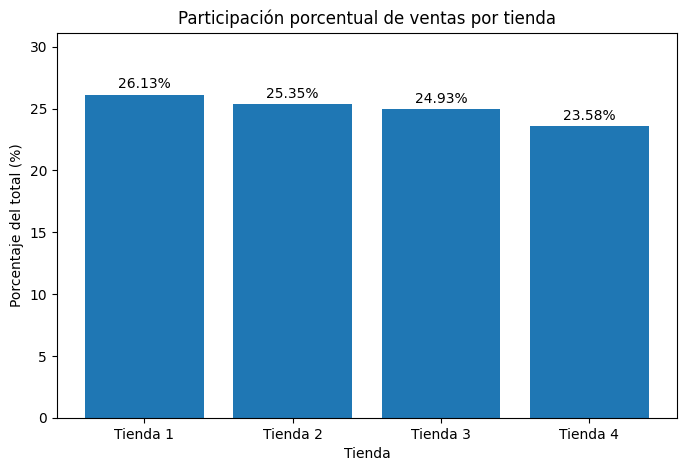

In [33]:

import matplotlib.pyplot as plt

tiendas = list(porcentajes.keys())
valores = list(porcentajes.values())

plt.figure(figsize=(8, 5))
plt.bar(tiendas, valores)
plt.title("Participación porcentual de ventas por tienda")
plt.xlabel("Tienda")
plt.ylabel("Porcentaje del total (%)")
plt.ylim(0, max(valores) + 5)

for i, v in enumerate(valores):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.show()

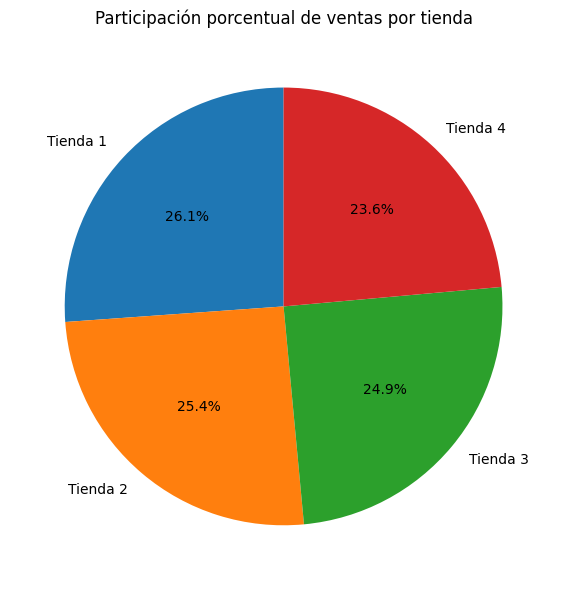

In [34]:
plt.figure(figsize=(6, 6))
plt.pie(
    valores,
    labels=tiendas,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Participación porcentual de ventas por tienda")
plt.tight_layout()
plt.savefig("participacion_ventas_pie.png", dpi=300)
plt.show()

# 2. Ventas por categoría

In [35]:

ventas_categoria_tienda1 = (
    tienda
    .groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_tienda1


,0
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [36]:

ventas_categoria_tienda2 = (
    tienda2
    .groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_tienda2

,0
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [37]:
ventas_categoria_tienda3 = (
    tienda3
    .groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_tienda3

ventas_categoria_tienda2

,0
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [38]:
ventas_categoria_tienda4 = (
    tienda4
    .groupby("Categoría del Producto")
    .size()
    .sort_values(ascending=False)
)

ventas_categoria_tienda4

,0
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [39]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

todas = pd.concat([tienda, tienda2, tienda3, tienda4])

ventas_categoria_tienda = (
    todas
    .groupby(["Tienda", "Categoría del Producto"])
    .size()
    .reset_index(name="Cantidad de Ventas")
)

ventas_categoria_tienda


,Tienda,Categoría del Producto,Cantidad de Ventas
0,Tienda 1,Artículos para el hogar,171
1,Tienda 1,Deportes y diversión,284
2,Tienda 1,Electrodomésticos,312
3,Tienda 1,Electrónicos,448
4,Tienda 1,Instrumentos musicales,182
5,Tienda 1,Juguetes,324
6,Tienda 1,Libros,173
7,Tienda 1,Muebles,465
8,Tienda 2,Artículos para el hogar,181
9,Tienda 2,Deportes y diversión,275


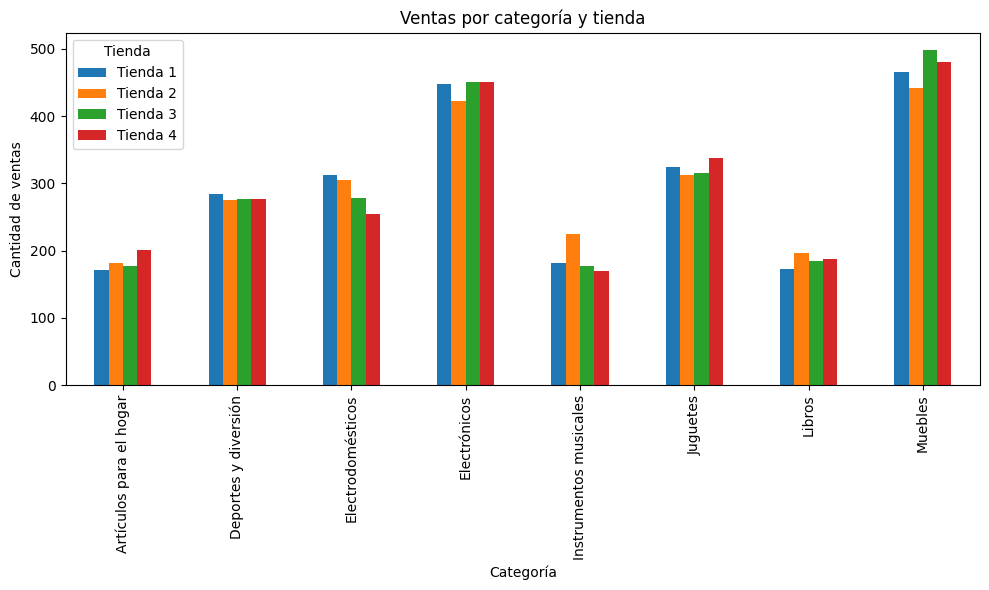

In [40]:
tabla_categoria = (
    ventas_categoria_tienda
    .pivot(index="Categoría del Producto", columns="Tienda", values="Cantidad de Ventas")
    .fillna(0)
)

tabla_categoria.plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Ventas por categoría y tienda")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ventas")
plt.legend(title="Tienda")
plt.tight_layout()
plt.savefig("ventas_categoria.png", dpi=300)
plt.show()


Al comparar una misma categoría entre las distintas tiendas, se observa que el volumen de ventas varía significativamente. Esto sugiere diferencias en la demanda según ubicación y perfil de clientes, lo que puede ser relevante para decisiones comerciales y de stock.

El análisis por producto permite identificar claramente qué artículos concentran la mayor y menor cantidad de ventas en cada tienda. Esta información es clave para evaluar la alineación del catálogo con la demanda del mercado y apoyar la toma de decisiones comerciales.

# 3. Calificación promedio de la tienda


In [41]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

todas = pd.concat([tienda, tienda2, tienda3, tienda4])

calificacion_promedio = (
    todas
    .groupby("Tienda")["Calificación"]
    .mean()
    .round(2)
    .reset_index()
)

calificacion_promedio

,Tienda,Calificación
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


El análisis de las calificaciones promedio permite evaluar el nivel de satisfacción de los clientes en cada tienda. Se observan diferencias entre las tiendas, evaluando la calificacióm Promedio por tienda, se visualiza que la tienda 1 la que tien la calificaciónmas baja (3,98) y la tienda 3 es la que tiene major calificación de (4,05) lo que puede estar relacionado con factores como la calidad del servicio, tiempos de envío o variedad de productos.

# 4. Productos más y menos vendidos

In [44]:

def productos_mas_y_menos_vendidos(df, nombre_tienda, top_n=5):
    conteo = df["Producto"].value_counts()

    mas_vendidos = conteo.head(top_n)
    menos_vendidos = conteo.tail(top_n)

    print(f"\n📊 {nombre_tienda}")
    print("\nProductos MÁS vendidos:")
    print(mas_vendidos)

    print("\nProductos MENOS vendidos:")
    print(menos_vendidos)

    return mas_vendidos, menos_vendidos

In [46]:
mv1, lv1 = productos_mas_y_menos_vendidos(tienda, "Tienda 1")
mv2, lv2 = productos_mas_y_menos_vendidos(tienda2, "Tienda 2")
mv3, lv3 = productos_mas_y_menos_vendidos(tienda3, "Tienda 3")
mv4, lv4 = productos_mas_y_menos_vendidos(tienda4, "Tienda 4")


📊 Tienda 1

Productos MÁS vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos MENOS vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

📊 Tienda 2

Productos MÁS vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos MENOS vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

📊 Tienda 3

Productos MÁS vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: i

In [50]:
def producto_mas_menos_vendido(df, nombre_tienda):
    conteo = df["Producto"].value_counts()

    mas_vendido = conteo.idxmax()
    menos_vendido = conteo.idxmin()

    print(f"\n📍 {nombre_tienda}")
    print(f"Producto MÁS vendido: {mas_vendido} ({conteo.max()} ventas)")
    print(f"Producto MENOS vendido: {menos_vendido} ({conteo.min()} ventas)")

In [51]:
producto_mas_menos_vendido(tienda, "Tienda 1")
producto_mas_menos_vendido(tienda2, "Tienda 2")
producto_mas_menos_vendido(tienda3, "Tienda 3")
producto_mas_menos_vendido(tienda4, "Tienda 4")



📍 Tienda 1
Producto MÁS vendido: Microondas (60 ventas)
Producto MENOS vendido: Auriculares con micrófono (33 ventas)

📍 Tienda 2
Producto MÁS vendido: Iniciando en programación (65 ventas)
Producto MENOS vendido: Juego de mesa (32 ventas)

📍 Tienda 3
Producto MÁS vendido: Kit de bancas (57 ventas)
Producto MENOS vendido: Bloques de construcción (35 ventas)

📍 Tienda 4
Producto MÁS vendido: Cama box (62 ventas)
Producto MENOS vendido: Guitarra eléctrica (33 ventas)


In [52]:
resumen_productos = []

for df, nombre in zip(
    [tienda, tienda2, tienda3, tienda4],
    ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
):
    conteo = df["Producto"].value_counts()
    resumen_productos.append({
        "Tienda": nombre,
        "Producto más vendido": conteo.idxmax(),
        "Ventas producto más vendido": conteo.max(),
        "Producto menos vendido": conteo.idxmin(),
        "Ventas producto menos vendido": conteo.min()
    })

df_resumen_productos = pd.DataFrame(resumen_productos)
df_resumen_productos


,Tienda,Producto más vendido,Ventas producto más vendido,Producto menos vendido,Ventas producto menos vendido
0,Tienda 1,Microondas,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


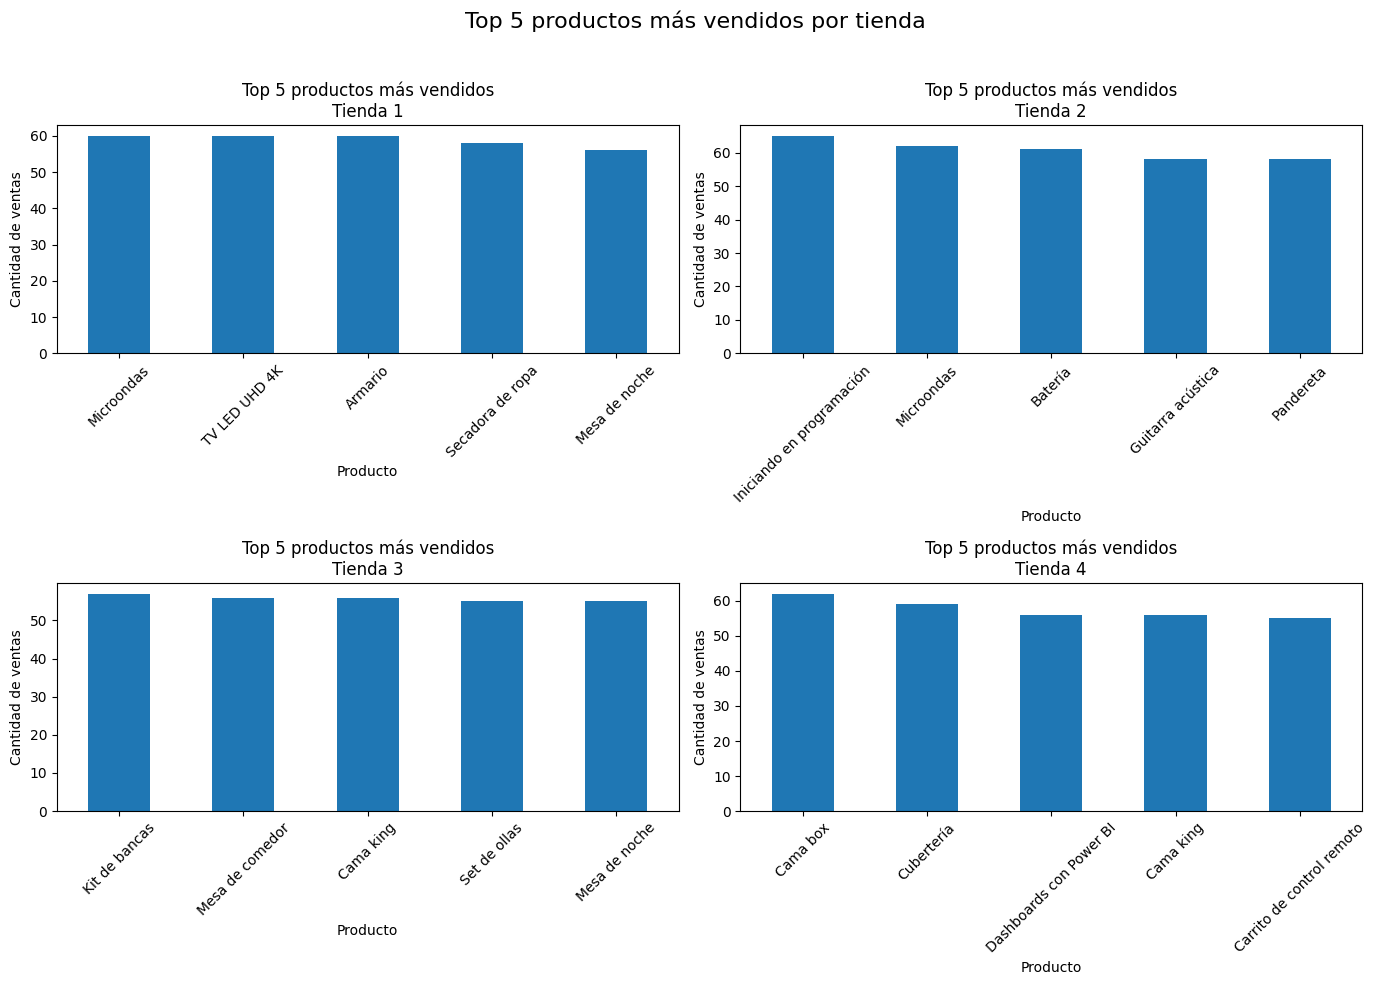

In [53]:
import matplotlib.pyplot as plt

tiendas_dfs = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (nombre, df) in zip(axes, tiendas_dfs.items()):
    top_productos = df["Producto"].value_counts().head(5)

    top_productos.plot(
        kind="bar",
        ax=ax
    )

    ax.set_title(f"Top 5 productos más vendidos\n{nombre}")
    ax.set_xlabel("Producto")
    ax.set_ylabel("Cantidad de ventas")
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Top 5 productos más vendidos por tienda", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("top_productos_por_tienda.png", dpi=300, bbox_inches="tight")

plt.show()

El análisis de ventas por producto permite identificar claramente cuáles son los artículos con mayor y menor demanda en cada tienda. Esta información es clave para decisiones de inventario, promociones y optimización del catálogo de productos.

# 5. Envío promedio por tienda

In [54]:
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

envio_promedio

def formato_moneda(valor):
    return f"${valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

print("📦 Costo de envío promedio por tienda:\n")

for tienda_nombre, costo in envio_promedio.items():
    print(f"{tienda_nombre}: {formato_moneda(costo)}")

📦 Costo de envío promedio por tienda:

Tienda 1: $26.018,61
Tienda 2: $25.216,24
Tienda 3: $24.805,68
Tienda 4: $23.459,46


In [55]:

df_envio_promedio = (
    pd.DataFrame.from_dict(envio_promedio, orient="index", columns=["Costo promedio"])
    .reset_index()
    .rename(columns={"index": "Tienda"})
)

df_envio_promedio["Costo promedio"] = df_envio_promedio["Costo promedio"].apply(formato_moneda)

df_envio_promedio



,Tienda,Costo promedio
0,Tienda 1,"$26.018,61"
1,Tienda 2,"$25.216,24"
2,Tienda 3,"$24.805,68"
3,Tienda 4,"$23.459,46"


El costo de envío promedio permite comparar el gasto asociado a cada tienda. Aunque el envío es asumido por el cliente, valores elevados pueden influir en la percepción del servicio y en la decisión de compra. En este caso el costo Promedio de envio es mas alto en la tienda 1 y el más bajo es en la tienda 4

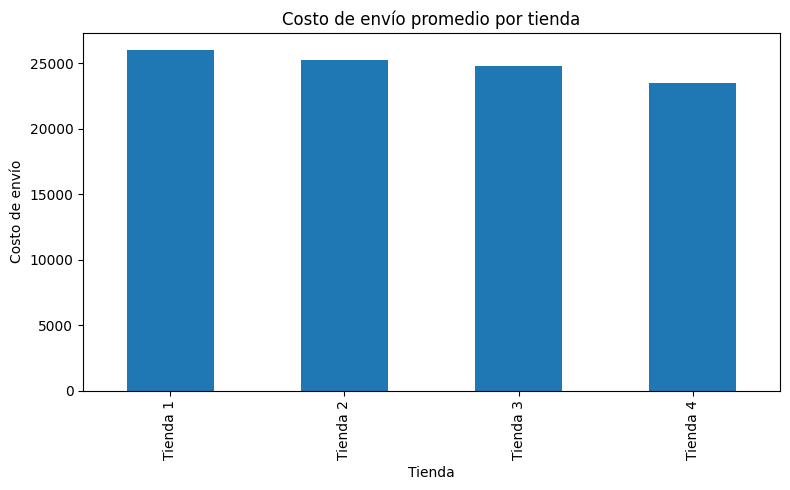

In [56]:
df_envio_promedio_plot = pd.DataFrame.from_dict(
    envio_promedio, orient="index", columns=["Costo promedio"]
)

df_envio_promedio_plot.plot(
    kind="bar",
    title="Costo de envío promedio por tienda",
    ylabel="Costo de envío",
    xlabel="Tienda",
    legend=False,
    figsize=(8, 5)
)

plt.tight_layout()
plt.savefig("costo_envio_promedio.png", dpi=300)


plt.show()

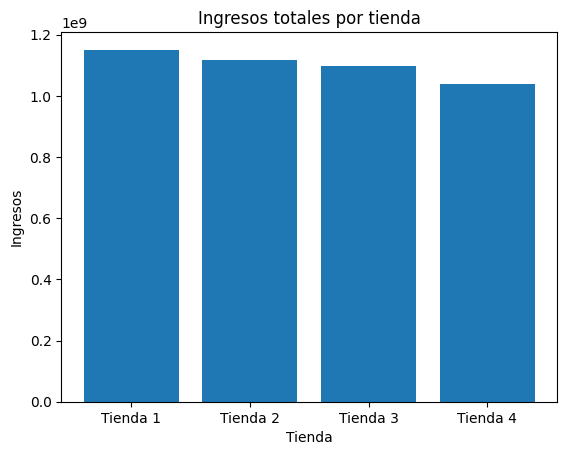

In [57]:
import matplotlib.pyplot as plt

tiendas = list(ingresos.keys())
valores = list(ingresos.values())

plt.figure()
plt.bar(tiendas, valores)
plt.title("Ingresos totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos")
plt.show()


In [58]:

calificaciones = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

costos_envio = envio_promedio

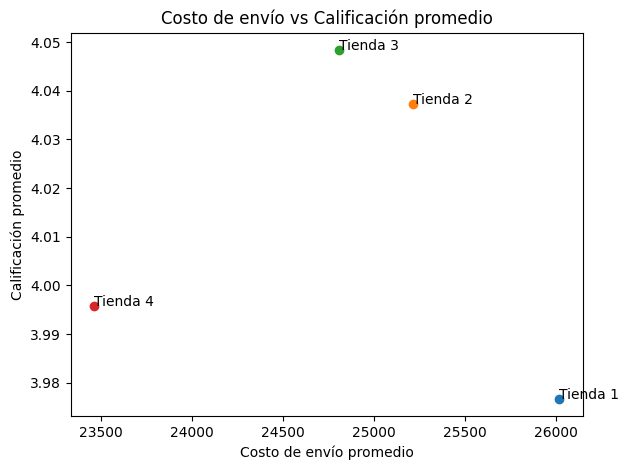

In [59]:
plt.figure()

for tienda_nombre in calificaciones:
    plt.scatter(costos_envio[tienda_nombre], calificaciones[tienda_nombre])
    plt.text(costos_envio[tienda_nombre], calificaciones[tienda_nombre], tienda_nombre)

plt.title("Costo de envío vs Calificación promedio")
plt.xlabel("Costo de envío promedio")
plt.ylabel("Calificación promedio")
plt.tight_layout()
plt.savefig("envio_vs_calificacion.png", dpi=300)
plt.show()


Las visualizaciones permiten identificar patrones relevantes en los datos. Se observa una diferencia clara en los ingresos entre tiendas, así como categorías de productos con mayor demanda. Además, al comparar el costo de envío promedio con la calificación de los clientes, es posible analizar si existe una relación entre el gasto en envío y la percepción del servicio.